In [2]:
library(tidyverse)
library(ggplot2)
library(ggthemes)
library(patchwork)
library(ggsci)
library(ggvenn)
library(ComplexHeatmap)
library(RColorBrewer)
library(ggbeeswarm)
library(tidyr)
library(circlize)
library(fastcluster)
library(gridExtra)

setwd("/data/wuqinhua/scPhase/Age")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: grid

ComplexHeatmap version 2.20.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformati

## 1. Attribution score top20 gene

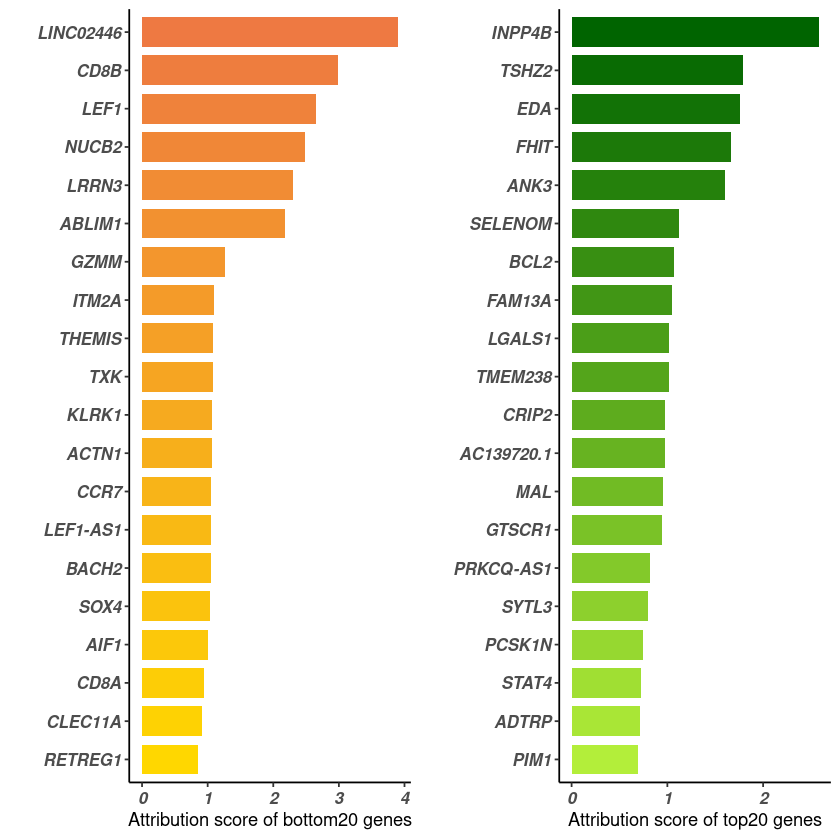

In [3]:
data <- read.table('./ensemble_gene_attributions_regression.csv', header = TRUE, sep = ',', stringsAsFactors = FALSE)
data <- data[order(data$mean_attribution, decreasing = TRUE),] 
top20 <- data[1:20, ]
bottom20 = data[(nrow(data)-19):nrow(data), ]

tp <- ggplot(top20, mapping = aes(x = reorder(gene, mean_attribution), y = mean_attribution)) +
  geom_bar(stat = 'identity', fill = colorRampPalette(c("#006400","#B3EE3A"))(20), width = 0.78, position = position_dodge(0.7)) +
  labs(x = " ", y = 'Attribution score of top20 genes', fill = "Gene", size = 8, family = "sans", face = "bold.italic") +
  coord_flip() +
  theme_classic() +
  theme(axis.text = element_text(family = "sans", size = 10, face = "bold.italic"))

bp <- ggplot(bottom20, mapping = aes(x = reorder(gene, -mean_attribution), y = -mean_attribution)) +  # Flip y-axis
  geom_bar(stat = 'identity', fill = colorRampPalette(c("#FFD700","#EE7942"))(20), width = 0.78, position = position_dodge(0.7)) +
  labs(x = " ", y = 'Attribution score of bottom20 genes', fill = "Gene", size = 8, family = "sans", face = "bold.italic") +
  coord_flip() +
  theme_classic() +
  theme(axis.text = element_text(family = "sans", size = 10, face = "bold.italic"))

combined_plot <- grid.arrange(bp, tp, ncol = 2)
ggsave("./Analysis/Figure/Attr_plot/Attr_top_bottom.pdf", plot = combined_plot, width = 10, height = 7)
